# Introduction
This demo shows examples of some of the features implemented for the manipulation of _Orchard Networks_.

# Construct networks
To construct an orchard network, one of this parameters must be passed:
- `eNewick` (_string_): the eNewick string,
- `sequence` (_string/list of pairs_): a reducible sequence,
- `mu_repr` (_set/dict/list_): from the $\mu$-representation (the $\mu$-vectors of the leaves are not needed)

Let's see an example for `sequence` and for `mu_repr`.

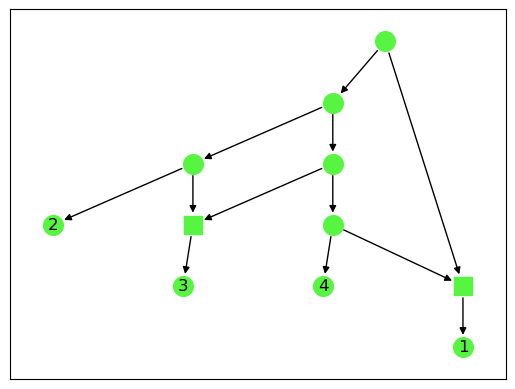

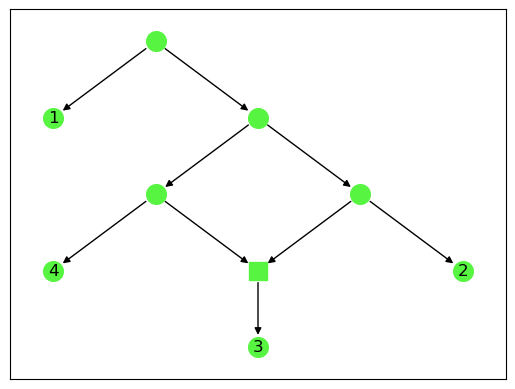

In [16]:
import phylonetwork as pn

net1 = pn.PhylogeneticNetwork(sequence="(1,4)(3,4)(2,3)(3,4)(1,4)")
net2 = pn.PhylogeneticNetwork(mu_repr=[
    [0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0], # ... leaves are not needed
    [1, 0, 1, 1, 0],
    [1, 0, 0, 1, 1],
    [2, 0, 1, 2, 1],
    [2, 1, 1, 2, 1]
])

# draw the nets
net1.draw()
net2.draw()

# Extended $\mu$-vectors
Given a network we can obtain the extended $\mu$-vector of some node or the extended $\mu$-representation.

In [2]:
net1.emu_dict  # node => emu-vector

{'_2': array([0, 1, 0, 0, 0]),
 '#2': array([1, 1, 0, 0, 0]),
 '_3': array([0, 0, 0, 0, 1]),
 '_5': array([0, 0, 0, 1, 0]),
 '_9': array([1, 1, 0, 0, 1]),
 '#1': array([1, 0, 0, 1, 0]),
 '_7': array([0, 0, 1, 0, 0]),
 '_8': array([2, 1, 0, 1, 1]),
 '_6': array([1, 0, 1, 1, 0]),
 '_4': array([3, 1, 1, 2, 1]),
 '_1': array([4, 2, 1, 2, 1])}

In [3]:
emu = net1.emu_representation  # same as above without the reticulations
emu

{'_2': array([0, 1, 0, 0, 0]),
 '_3': array([0, 0, 0, 0, 1]),
 '_5': array([0, 0, 0, 1, 0]),
 '_9': array([1, 1, 0, 0, 1]),
 '_7': array([0, 0, 1, 0, 0]),
 '_8': array([2, 1, 0, 1, 1]),
 '_6': array([1, 0, 1, 1, 0]),
 '_4': array([3, 1, 1, 2, 1]),
 '_1': array([4, 2, 1, 2, 1])}

In [4]:
net1.emu('#1')

array([1, 0, 0, 1, 0])

# Reducible pairs/sequence
Moreover, given a network, we can obtain its reducible pairs, as well as all the complete reducible sequence and the smallest one.

In [5]:
net1.is_orchard()

True

In [6]:
net1.reducible_pairs

[(1, 4), (3, 2)]

In [7]:
net1.smallest_pair

(1, 4)

In [8]:
net1.all_sequences  # or all_sequences_array

['(1,4)(3,4)(2,3)(3,4)(1,4)',
 '(1,4)(3,2)(3,4)(2,4)(1,4)',
 '(3,2)(1,4)(3,4)(2,4)(1,4)']

In [9]:
S = net1.smallest_sequence  # or smallest_sequences_array
S

'(1,4)(3,2)(3,4)(2,4)(1,4)'

# Adding/Reducing reducible pairs
To add or reduce a pair in the network we can use the methods `add_pair` and `reduce_pair`. To add or reduce repeatedly many pairs, it can be used `add_sequence` and `reduce_sequence`. For example,

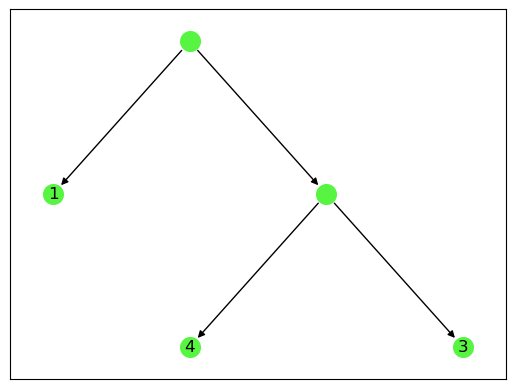

In [10]:
# reduce (1,4), then (3,4) and finally (2,3)
net1.reduce_sequence("(1,4)(3,4)(2,3)")
net1.draw()

Now, if we print the extended $\mu$-representation of this network, notice that the number of coordinates remains invariant, as if there were 4 leaves.

In [11]:
net1.emu_representation

{'_5': array([0, 0, 0, 1, 0]),
 '_3': array([0, 0, 0, 0, 1]),
 '_2': array([0, 1, 0, 0, 0]),
 '_4': array([0, 0, 0, 1, 1]),
 '_1': array([0, 1, 0, 1, 1])}

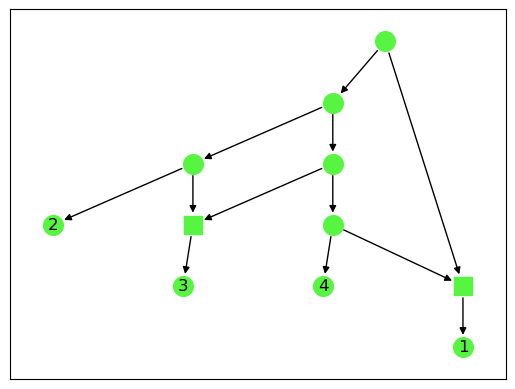

In [12]:
# adds (2,3), then (3,4) and finally (1,4)
net1.add_sequence("(1,4)(3,4)(2,3)")
net1.draw()

# Extended $\mu$-distance and isomorphism
This example show how to compute the distance given two networks $N_1$ and $N_2$.

In [13]:
net1.distance(net2)

7

Finally, given two orchard networks $N_1$ and $N_2$, there are isomorphic if, and only if, their distance is 0. To show this, we will build $N_3$ from the smallest sequence of $N_1$ and then from its extended $\mu$-representation. Notice that both reconstructions must be isomorphic to $N_1$.

In [14]:
net3 = pn.PhylogeneticNetwork(sequence=S)
net1.distance(net3)

0

In [15]:
net3 = pn.PhylogeneticNetwork(mu_repr=emu)
net1.distance(net3)

0